In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import scipy 
import scipy.optimize as so


from scipy import odr
from uncertainties import unumpy, ufloat

In [2]:
dataframe_exercise= pd.read_csv("ex9_data.csv") 

In [3]:
dataframe_exercise

,x
0,1.162271
1,1.142611
2,1.487702
3,1.214966
4,0.378743
...,...
599,0.249427
600,1.052465
601,1.383870
602,0.792205


In [4]:
x=dataframe_exercise["x"].to_numpy(dtype="float64")
x

array([1.1622708 , 1.14261148, 1.48770249, 1.21496573, 0.37874302,
       0.62203172, 1.0953066 , 1.79740888, 1.75981583, 1.86911372,
       1.01101851, 0.01522954, 0.22897083, 0.98015134, 0.94751544,
       0.9171621 , 0.9536214 , 0.78055541, 0.99238395, 0.93266941,
       0.87158149, 0.22673927, 1.51594492, 0.68183842, 0.4634497 ,
       1.91125515, 0.85968954, 1.17322892, 0.90448532, 1.08096202,
       0.83139516, 1.4324792 , 0.42711986, 1.466674  , 1.10117519,
       1.09153629, 1.65308797, 1.27073958, 1.77698119, 1.42790263,
       0.40242512, 1.11821113, 0.96492786, 1.3668637 , 0.12219591,
       1.19114803, 0.77530112, 0.85800701, 1.23900982, 1.47837635,
       0.12114132, 1.64125673, 0.53211714, 1.15044652, 0.95048631,
       1.95461092, 1.61853954, 1.57732227, 1.80917583, 0.89420001,
       0.45600729, 0.21842884, 1.13526166, 1.92828619, 0.93642246,
       1.92626855, 1.39621025, 1.37198935, 1.11521587, 1.48525265,
       1.61232844, 1.20551894, 1.48201961, 1.18951576, 1.34264

In [5]:
np.sqrt(len(x))

24.576411454889016

First of all I plot the data as a histogram

Text(0, 0.5, 'Frequency')

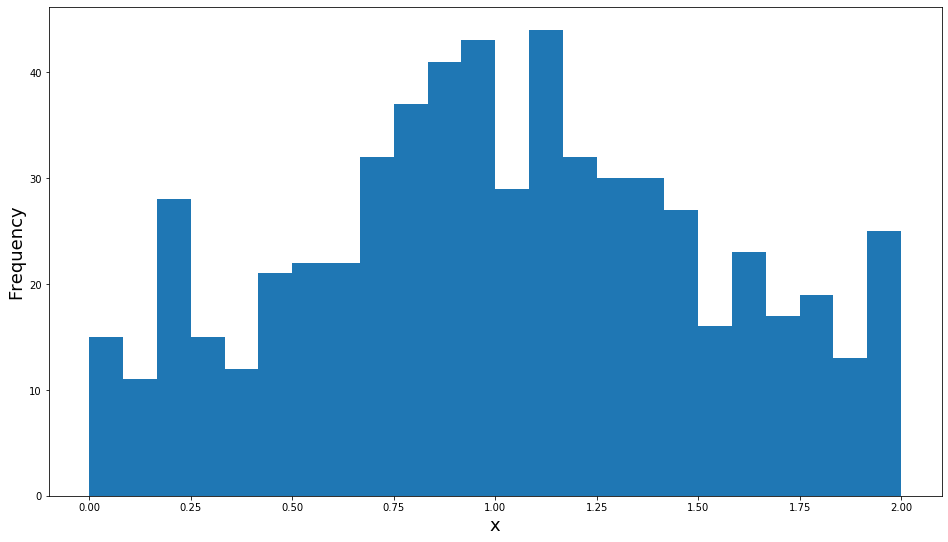

In [29]:
bins=np.linspace(0,2, num=25)

fig = plt.figure(figsize=(16, 9), dpi=72)
plt.hist(x, bins=bins)
plt.xlabel("x",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

2.Now I want to perform an extended maximum likelihood fit. <br>

The extended maximum likelihood is defined by 

$$L=\frac{\nu^n}{n!}\cdot e^{-\nu}\cdot \prod_{i=1}^{n} f(x_i,\theta)$$

$$ln(L)=-\nu+\sum_{i=1}^{n} ln(\nu f(x_i,\theta))+C$$

In our case we have $$f(x)=\frac{\nu_s}{\nu_s+\nu_B}\cdot f_s(x)+\frac{\nu_B}{\nu_s+\nu_B}\cdot f_B(x)$$

The Poissonian distribution in this case is characterized by $$\nu=\nu_s+\nu_B$$

Putting these thingsa together into our log-Likelihood then leads to:
    
$$ln(L)=-\nu_s-\nu_B+\sum_{i=1}^{n} ln(\nu_s\cdot f_s(x)+\nu_B\cdot f_B(x))+C$$

Furthermore we have $$f_s(x)=\frac{1}{2}$$ and $$\frac{4}{erf(2\sqrt{2})\cdot \sqrt{2\pi}}\cdot exp\Big[-\frac{1}{2}\cdot \Big(\frac{x-1}{1/4}\Big)^2\Big]$$

Now I can write my log-Likelihood function

In [7]:
import scipy.special

In [16]:
def log_likelihood(nu_s,nu_B,x):
    #nu_s, nu_B = params
    return -nu_s-nu_B+np.sum(np.log(1/2*nu_s+nu_B*4/(np.sqrt(2*np.pi)*scipy.special.erf(2*np.sqrt(2)))*np.exp(-1/2*((x-1)/(1/4))**2)))

3. Now I consider $\nu_B=420.7$ and I want to obtain $\nu_s$ by Maximum Likelihood estimation. A Maximization of the Likelihood corresponds to a Minimization of the negative log Likelihood. Therefore I define a new function

In [17]:
def neg_log_likelihood(params,x):
    nu_s,nu_B = params
    return -log_likelihood(nu_s,420.7,x)

In [18]:
Optimal= so.minimize(neg_log_likelihood,x0=[1,420.7],args=(x))["x"]

In [19]:
Optimal

array([313.13059799, 420.7       ])

In [22]:
nu_s_max=Optimal[0]
nu_s_max

313.1305979864024

4. Now I want to plot log(L) as a function of different values of $\nu_s$ around the just obtained $\nu_{s_{max}}$

In [23]:
nu_s_array=np.linspace(0,2*nu_s_max,10000)
nu_s_array

array([0.00000000e+00, 6.26323828e-02, 1.25264766e-01, ...,
       6.26135931e+02, 6.26198564e+02, 6.26261196e+02])

In [24]:
log_L_array=np.zeros(0)

for i in range(len(nu_s_array)):
    log_L=log_likelihood(nu_s_array[i],420.7,x)
    
    log_L_array=np.append([log_L_array],[log_L])   #Calculate the log_L values for the different nu_s
    
log_L_array

array([2282.80234111, 2286.64722808, 2290.27095665, ..., 2759.8171611 ,
       2759.79253323, 2759.76790255])

(2200, 2900)

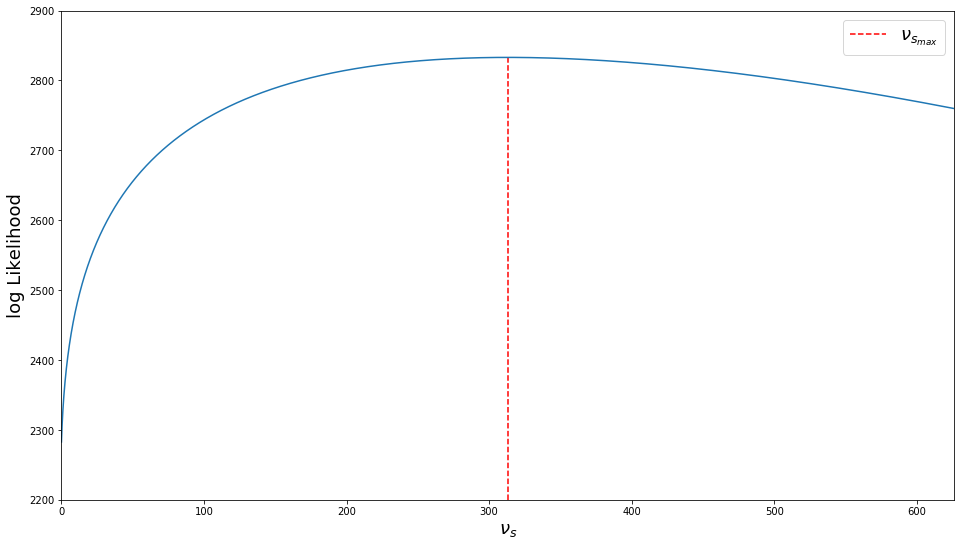

In [57]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.vlines(nu_s_max,2200,np.max(log_L_array),"r","--",alpha=1,label=r"$\nu_{s_{max}}$")
plt.plot(nu_s_array,log_L_array)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.ylabel("log Likelihood",fontsize=18)
plt.legend(fontsize=18)
plt.xlim(0,2*nu_s_max)
plt.ylim(2200,2900)

Now I want to plot $exp(ln(L(\nu_s))-ln(L_{max}))$

Text(0, 0.5, '$exp(ln(L(\\nu_s))-ln(L_{max}))$')

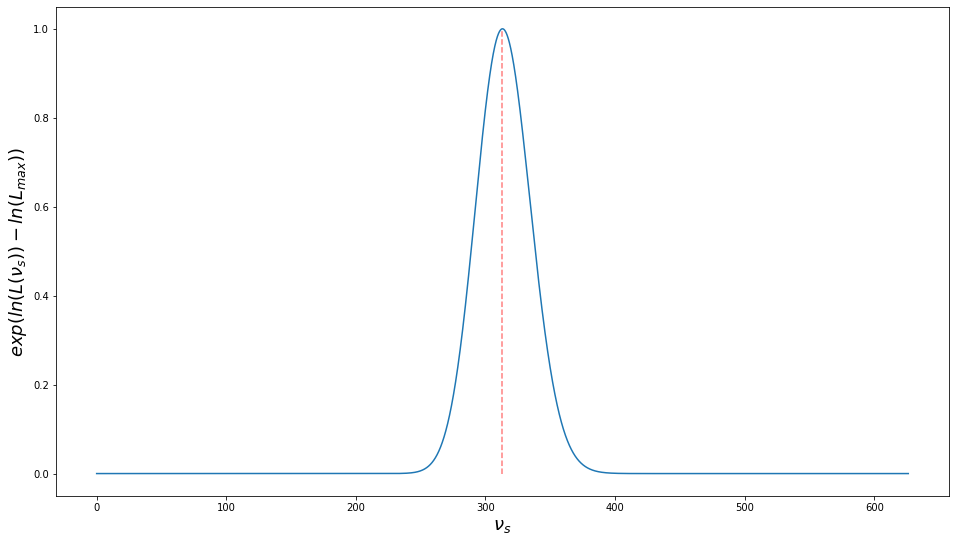

In [58]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.vlines(nu_s_max,0,1,"r","--",alpha=0.5,label=r"$\nu_{s_{max}}$")
plt.plot(nu_s_array,np.exp(log_L_array-log_likelihood(nu_s_max,420.7,x)))
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.ylabel(r"$exp(ln(L(\nu_s))-ln(L_{max}))$",fontsize=18)

5. First of all I generate random values of $\nu_s$ uniformly distributed around $\nu_{s_{max}}$

In [59]:
rand_array=np.random.uniform(0,2*nu_s_max,10000)

Now I want to plot thesNow I want to plot these values weighted by $exp(ln(L(\nu_s))-ln(L_{max}))$

First of all I just plot the random data

Text(0, 0.5, 'Frequency')

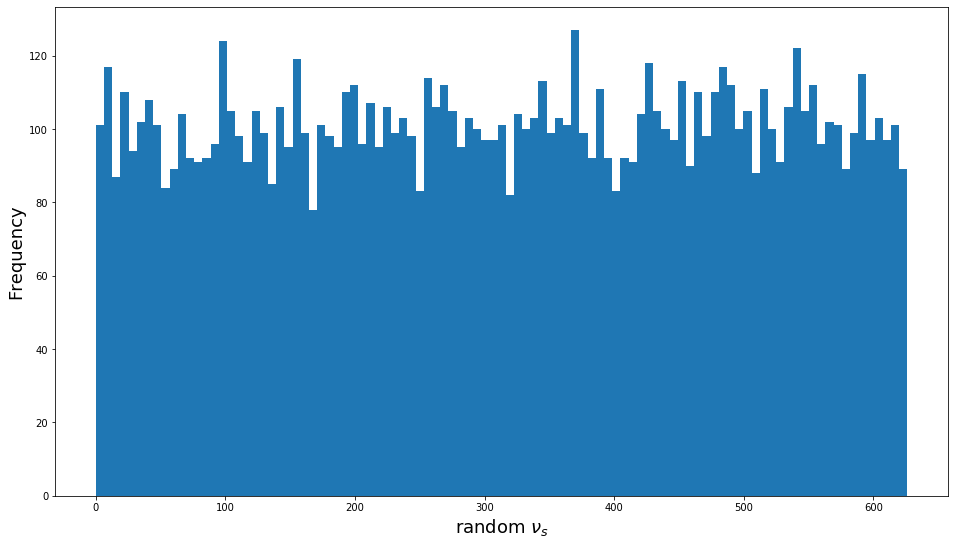

In [67]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig = plt.figure(figsize=(16, 9), dpi=72)
number=plt.hist(rand_array,bins=bins)[0]   #Frequency array

plt.xlabel(r"random $\nu_s$",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

In [68]:
number

array([101., 117.,  87., 110.,  94., 102., 108., 101.,  84.,  89., 104.,
        92.,  91.,  92.,  96., 124., 105.,  98.,  91., 105.,  99.,  85.,
       106.,  95., 119.,  99.,  78., 101.,  98.,  95., 110., 112.,  96.,
       107.,  95., 106.,  99., 103.,  98.,  83., 114., 106., 112., 105.,
        95., 103., 100.,  97.,  97., 101.,  82., 104., 100., 103., 113.,
        99., 103., 101., 127.,  99.,  92., 111.,  92.,  83.,  92.,  91.,
       104., 118., 105., 100.,  97., 113.,  90., 110.,  98., 110., 117.,
       112., 100., 105.,  88., 111., 100.,  91., 106., 122., 105., 112.,
        96., 102., 101.,  89.,  99., 115.,  97., 103.,  97., 101.,  89.])

I define the center points of my bins

In [69]:
nu_hist=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    nu_hist[i]=np.abs(bins[i]+bins[i+1])/2
    

nu_hist

array([  3.16293533,   9.488806  ,  15.81467667,  22.14054733,
        28.466418  ,  34.79228867,  41.11815933,  47.44403   ,
        53.76990066,  60.09577133,  66.421642  ,  72.74751266,
        79.07338333,  85.399254  ,  91.72512466,  98.05099533,
       104.376866  , 110.70273666, 117.02860733, 123.35447799,
       129.68034866, 136.00621933, 142.33208999, 148.65796066,
       154.98383133, 161.30970199, 167.63557266, 173.96144333,
       180.28731399, 186.61318466, 192.93905532, 199.26492599,
       205.59079666, 211.91666732, 218.24253799, 224.56840866,
       230.89427932, 237.22014999, 243.54602066, 249.87189132,
       256.19776199, 262.52363266, 268.84950332, 275.17537399,
       281.50124465, 287.82711532, 294.15298599, 300.47885665,
       306.80472732, 313.13059799, 319.45646865, 325.78233932,
       332.10820999, 338.43408065, 344.75995132, 351.08582198,
       357.41169265, 363.73756332, 370.06343398, 376.38930465,
       382.71517532, 389.04104598, 395.36691665, 401.69

Now I calculate the log_Likelihood for the nu_hist values

In [70]:
log_L_hist_array=np.zeros(0)

for i in range(len(nu_hist)):
    log_L_hist=log_likelihood(nu_hist[i],420.7,x)
    
    log_L_hist_array=np.append([log_L_hist_array],[log_L_hist])
    
log_L_hist_array

array([2382.4120234 , 2467.00190512, 2517.94801747, 2555.30984913,
       2584.96682104, 2609.56237547, 2630.53877058, 2648.77877835,
       2664.86608255, 2679.20873054, 2692.10429797, 2703.77712503,
       2714.40093714, 2724.11327431, 2733.02507022, 2741.2272264 ,
       2748.79525331, 2755.79262688, 2762.27326766, 2768.28340597,
       2773.86300817, 2779.0468832 , 2783.86555247, 2788.34594157,
       2792.51193633, 2796.38483415, 2799.98371352, 2803.32573912,
       2806.42641557, 2809.29979996, 2811.958681  , 2814.41473093,
       2816.67863506, 2818.76020281, 2820.66846337, 2822.41174847,
       2823.99776428, 2825.43365419, 2826.72605379, 2827.88113921,
       2828.90466974, 2829.80202555, 2830.57824123, 2831.23803556,
       2831.78583818, 2832.22581341, 2832.56188163, 2832.79773858,
       2832.93687265, 2832.98258061, 2832.93798182, 2832.8060311 ,
       2832.58953048, 2832.29113987, 2831.91338683, 2831.45867545,
       2830.92929454, 2830.32742513, 2829.65514733, 2828.91444

I just plot the values I found this way

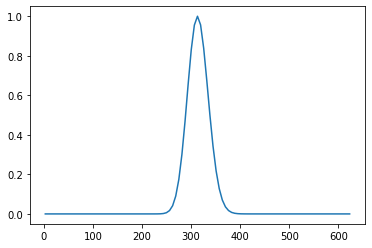

In [71]:
plt.plot(nu_hist,np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x)))

Now I want to weight the histogram of the random values

In [72]:
height=number*np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x))

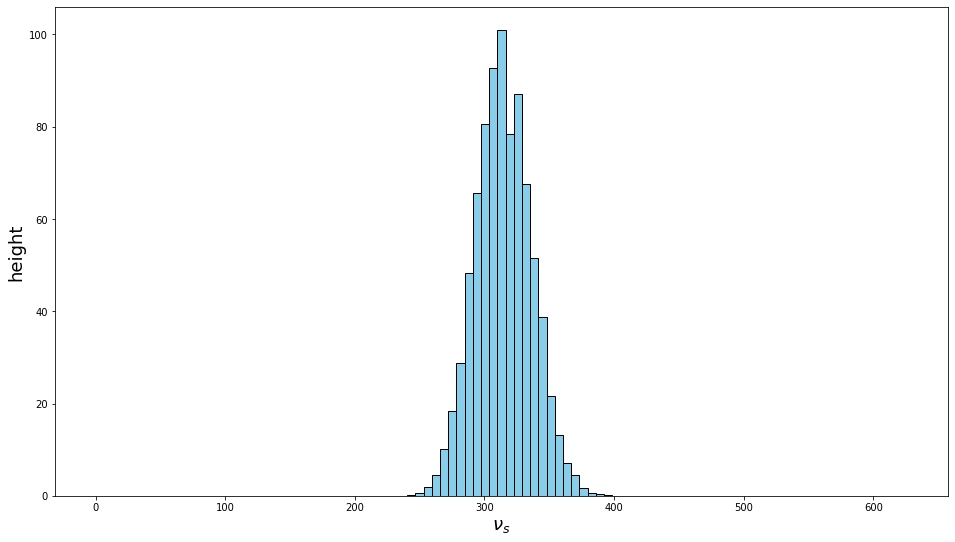

In [88]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height, width=np.diff(bins), align='edge', fc='skyblue', ec='black')
plt.ylabel("height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

Now I want to normalize this distribtuion

In [76]:
Norm=np.sum(height)*np.diff(bins)

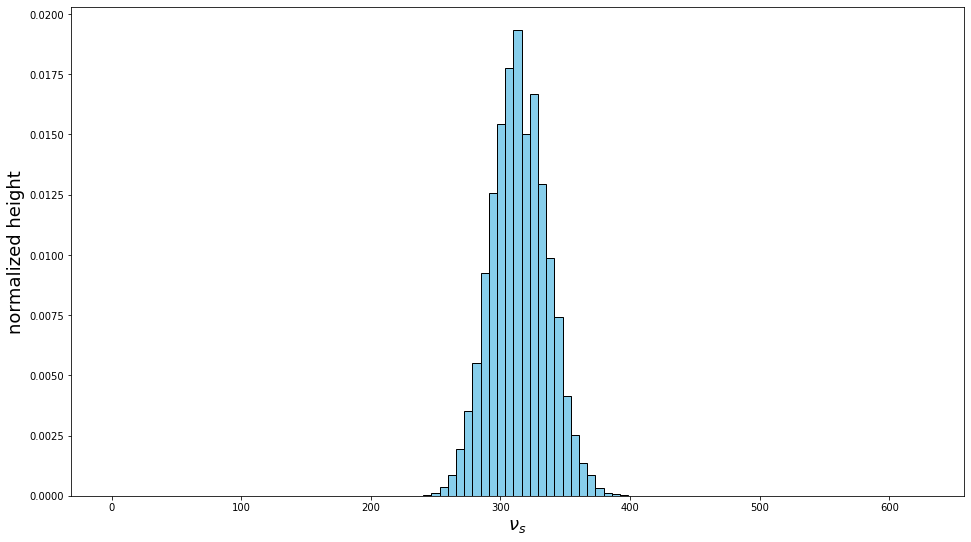

In [93]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

In that case we have for the integral

In [79]:
np.sum(height/(Norm)*np.diff(bins))

0.9999999999999999

So it is normalized to 1

It looks like a gaussian distribution.

6. Now I want to represent this distribution with a gaussian kernel estimator

The way I did it here is to take the height and make an array with the same length and then put it at the corresponding nu_s position. A problem is that the height values are not whole numbers so therefore the kernel estimator will only be an approximation

In [96]:
ges_bin=np.zeros(0)

for i in range(len(height)):
    k=int(np.round(height[i]))
    sub_bin=np.ones(k)*nu_hist[i]    #Take the height and make an array with the same length and then put it at the corresponding nu_s position
    
    ges_bin=np.concatenate((ges_bin, sub_bin), axis=None)
    
ges_bin

array([249.87189132, 256.19776199, 256.19776199, 262.52363266,
       262.52363266, 262.52363266, 262.52363266, 268.84950332,
       268.84950332, 268.84950332, 268.84950332, 268.84950332,
       268.84950332, 268.84950332, 268.84950332, 268.84950332,
       268.84950332, 275.17537399, 275.17537399, 275.17537399,
       275.17537399, 275.17537399, 275.17537399, 275.17537399,
       275.17537399, 275.17537399, 275.17537399, 275.17537399,
       275.17537399, 275.17537399, 275.17537399, 275.17537399,
       275.17537399, 275.17537399, 275.17537399, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50124465,
       281.50124465, 281.50124465, 281.50124465, 281.50

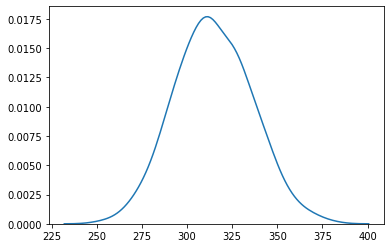

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity

sns.kdeplot(ges_bin)

Now I plot the kernel estimator with the distribution.

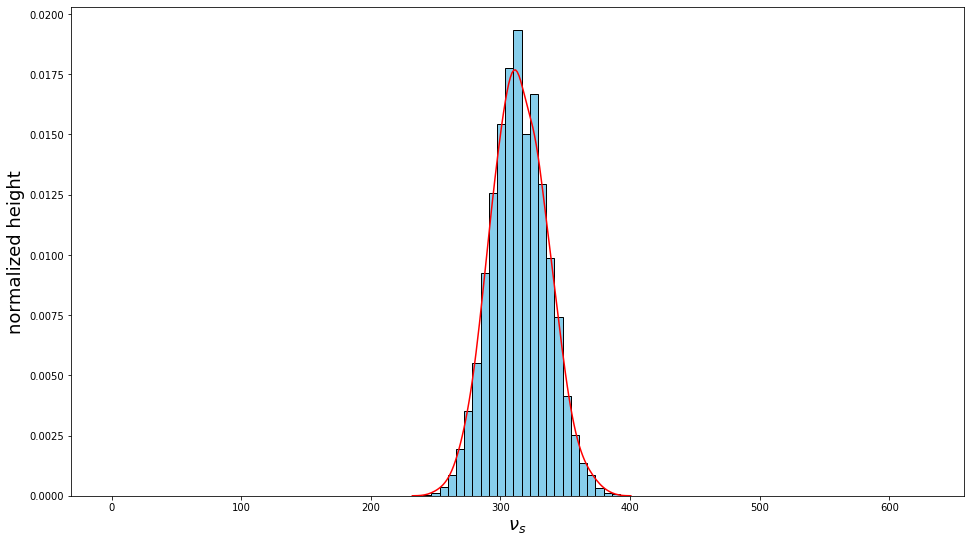

In [98]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')
sns.kdeplot(ges_bin, color="r")

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)

plt.show()

7.Now we want to repeat the same thing but instead of using a uniform distribution around $\nu_s$ we will use a gaussian distribution with mean 350 and width 50

In [103]:
rand_array=np.random.normal(350,50,10000)

Again I plot this random data

Text(0, 0.5, 'Frequency')

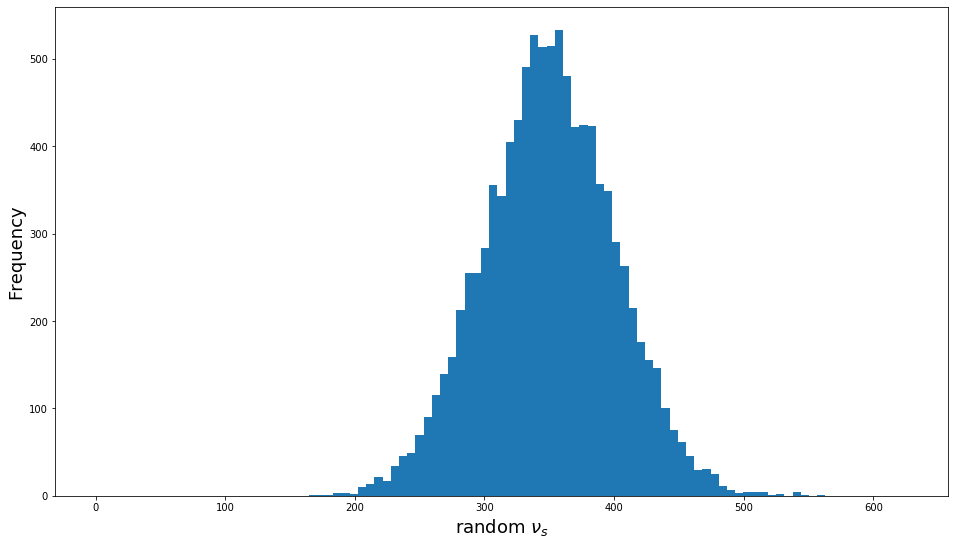

In [104]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig = plt.figure(figsize=(16, 9), dpi=72)
number=plt.hist(rand_array,bins=bins)[0]   #Frequency array

plt.xlabel(r"random $\nu_s$",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

Now I basically repeat the things I did before


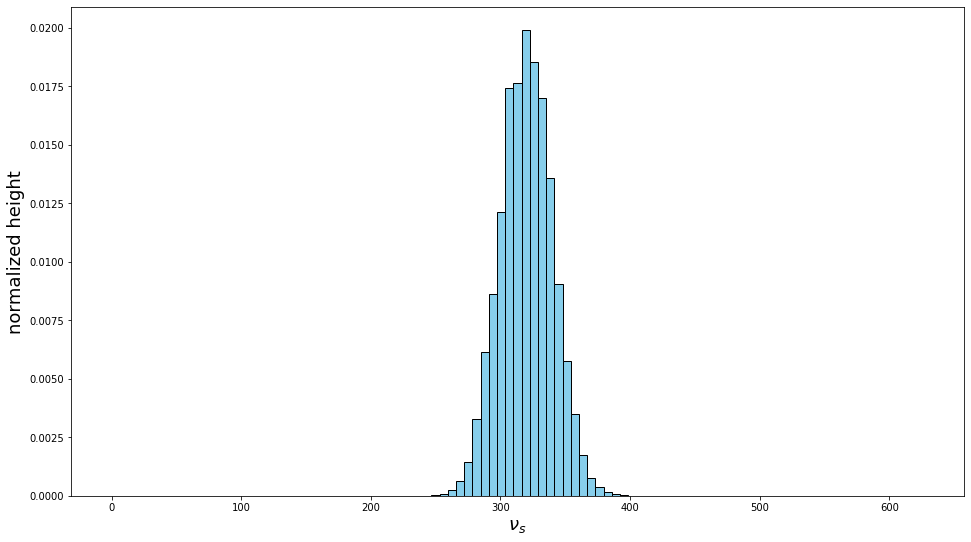

In [105]:
nu_hist=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    nu_hist[i]=np.abs(bins[i]+bins[i+1])/2
    

#nu_hist

log_L_hist_array=np.zeros(0)

for i in range(len(nu_hist)):
    log_L_hist=log_likelihood(nu_hist[i],420.7,x)
    
    log_L_hist_array=np.append([log_L_hist_array],[log_L_hist])
    
#log_L_hist_array

height=number*np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x))


Norm=np.sum(height)*np.diff(bins)


fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

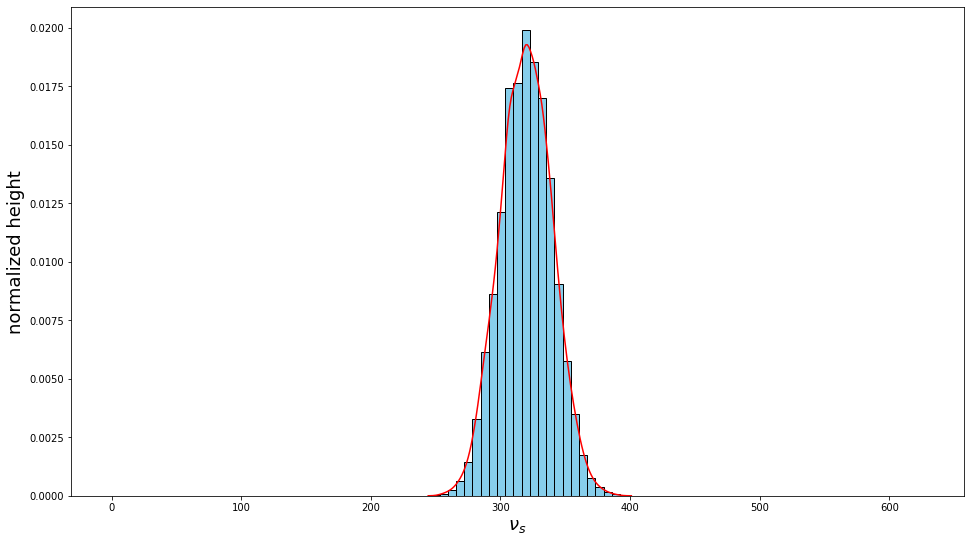

In [106]:
ges_bin=np.zeros(0)

for i in range(len(height)):
    k=int(np.round(height[i]))
    sub_bin=np.ones(k)*nu_hist[i]    #Take the height and make an array with the same length and then put it at the corresponding nu_s position
    
    ges_bin=np.concatenate((ges_bin, sub_bin), axis=None)
    
#ges_bin

bins=np.linspace(0,2*nu_s_max, num=100)

fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')
sns.kdeplot(ges_bin, color="r")

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)

plt.show()

I obtain a similar distribution as before.

8. Now I want to look at the 2D case. Therefore I redefine my Likelihood function

In [107]:
def log_likelihood(nu_s,nu_B,x):
    #nu_s, nu_B = params
    return -nu_s-nu_B+np.sum(np.log(1/2*nu_s+nu_B*4/(np.sqrt(2*np.pi)*scipy.special.erf(2*np.sqrt(2)))*np.exp(-1/2*((x-1)/(1/4))**2)))
    

In [108]:
def neg_log_likelihood(params,x):
    nu_s,nu_B = params
    return -log_likelihood(nu_s,nu_B,x)

In [109]:
Optimal= so.minimize(neg_log_likelihood,x0=[1,420.7],args=(x))["x"]
Optimal

array([428.58617807, 175.40236665])

In [111]:
nu_s_max=Optimal[0]
nu_s_max

428.58617806998234

In [112]:
nu_B_max=Optimal[1]
nu_B_max

175.40236664986185